## Introduction to Perceptron

The Perceptron is a fundamental algorithm in the field of machine learning, particularly in the study of artificial neural networks. Developed by Frank Rosenblatt in 1957, it's one of the earliest and simplest types of artificial neural network models. 

### What is Perceptron?

The Perceptron is a type of linear classifier, meaning it makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm enables neurons to learn and processes elements in the training set one at a time.

## How Does Perceptron Work?

The Perceptron works as follows:
1. **Initialization**: Weights are initialized randomly.
2. **Activation**: Each input $x_i$ is multiplied by its corresponding weight $w_i$, and the results are summed up.
3. **Thresholding**: The sum is then passed through an activation function, often a step function. If the sum is above a certain threshold, the Perceptron outputs a 1 (or true), otherwise, it outputs a 0 (or false).
4. **Weight Update**: If the prediction is incorrect, the weights are updated, and the process repeats.

The process continues until the algorithm converges on a set of weights that correctly classify the input data, or until a maximum number of iterations is reached.

### Benefits of Perceptron

- **Simplicity**: It's easy to understand and implement, making it a great starting point for learning about neural networks.
- **Efficiency**: Due to its simplicity, it's computationally efficient.
- **Foundation for Neural Networks**: Understanding Perceptrons is a step towards understanding more complex neural network structures.

Below is a visual representation of a Perceptron model:

![Perceptron Model](ThePerceptronImage.png)


### Perceptron Implementation

We will begin by importing the following packages


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme with a specific style and palette
sns.set_theme(style="whitegrid", palette="pastel")


## Dataset Overview

In this section, we will be working with a dataset that focuses on CO2 emissions from various car models, incorporating different properties of the cars. This dataset is particularly relevant as it offers insights into the environmental impact of different vehicles, a critical aspect in the era of climate change awareness.

### Data Source

The dataset is compiled from Canadian sources and encompasses a range of car properties including make, model, fuel type, and engine size. Such comprehensive data allows for a analysis of factors contributing to CO2 emissions. The dataset can be found at [this link](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles).


In [75]:
# Import the data - CO2 emissions based on car model and other car properties (Canadian Data)
fuel_df = pd.read_csv("Data/CO2_Emissions_Canada.csv")

# Look at the file
fuel_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [76]:
# Filter the data for 4 or 6 cylinders
filtered_df = fuel_df[fuel_df['Cylinders'].isin([4, 6])]

# Limit to the first 200 data points to reduce size
filtered_df = filtered_df.iloc[:200]

# Create the y vector
y = np.where(filtered_df['Cylinders'] == 4, -1, 1)

# Create the X matrix
X = filtered_df[['Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']].values

# My original test was fuel consumption vs CO2 emissions, but problems arised
# X = filtered_df[['Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']].values

## Create the Perceptron Model

In [77]:
class Perceptron:
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors_ = []  # Initialize the errors list

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)



In [78]:
# Create one instance of the Perceptron class
fuelEmissionModel = Perceptron(eta=0.1, epochs=10_000)

# Call the fit method to train the weights and bias of the given instance
fuelEmissionModel.fit(X, y)

In [79]:
#Need to update
# Predict labels on the features in X
y_predicted = fuelEmissionModel.predict(X)

# Compare y_predicted and y
print(y == y_predicted)


[ True  True  True  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True False  True False  True False
  True False  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False False False  True
  True  True  True False False False False  True  True False  True  True
  True  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True False  True  True False  True  True
  True  True  True  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

## Prediction Analysis

After applying the `fuelEmissionModel`, we observe that the predictions (`y_predicted`) do not perfectly match the actual labels (`y`). This discrepancy suggests that the Perceptron, as a simple linear classifier, might not be fully suitable for this dataset's complexity. Adjustments in the algorithm, features, or model parameters could potentially improve accuracy.


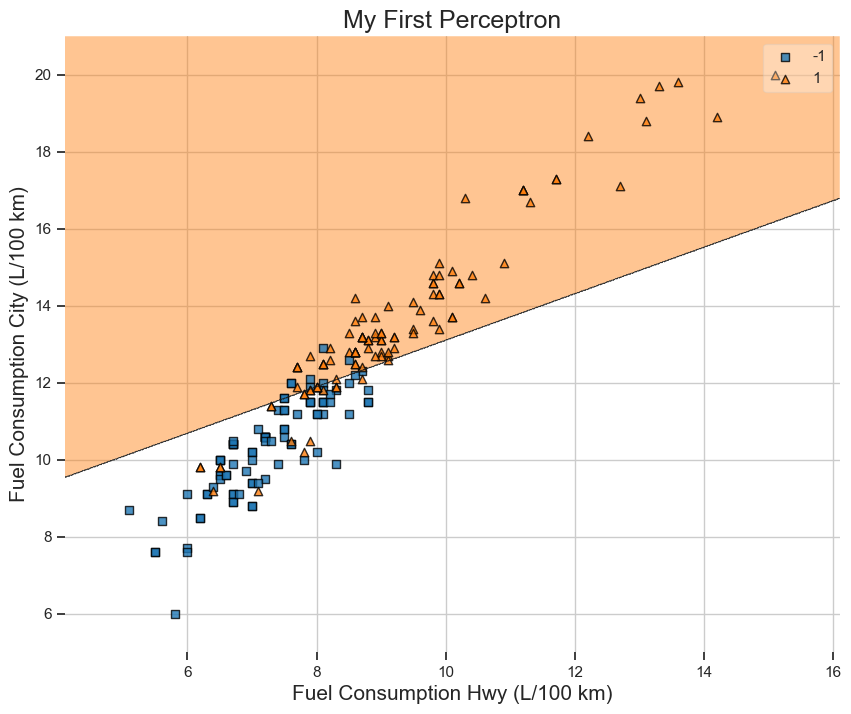

In [80]:
# A plot of data with Perceptron region prediction
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, clf=clf)
plt.title("My First Perceptron", fontsize=18)
plt.xlabel("Fuel Consumption Hwy (L/100 km)", fontsize=15)
plt.ylabel("Fuel Consumption City (L/100 km)", fontsize=15)
plt.show()

## Perceptron Decision Region Visualization

The plot above showcases the decision regions predicted by our Perceptron model. It's evident that the data exhibits a somewhat linear trend, yet there's noticeable overlap between the two groups. Despite this, the Perceptron algorithm manages to effectively delineate the two regions, demonstrating its ability to capture the underlying pattern in the data, even in the presence of some complexity and overlap.

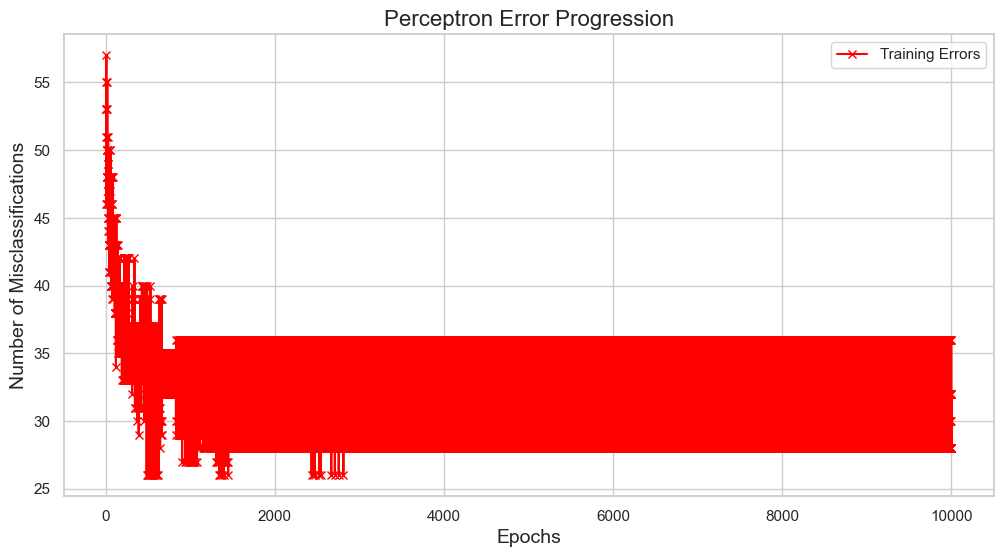

In [81]:
# Error Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(fuelEmissionModel.errors_) + 1), fuelEmissionModel.errors_, marker='x', linestyle='-', color='red')
plt.title('Perceptron Error Progression', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Number of Misclassifications', fontsize=14)
plt.grid(True)
plt.legend(['Training Errors'], loc='upper right')
plt.show()

## Conclusion on Epochs and Model Performance

Upon extending the training of our Perceptron model, we observe that the error rate begins to stagnate around 1000 epochs. This indicates that beyond this point, additional training does not significantly improve the model's ability to classify the data accurately. Therefore, setting the number of epochs to 1000 is a reasonable choice for our model, balancing the trade-off between computational efficiency and model accuracy.
